In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matoltlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('titanic_data.csv')
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [137]:
#Type of features:
    #Catagorical : name,sex,embarked
    #continuous : age,fare
    #discrete : sibsp,parch,servived
    #alphanumeric : cabin
        

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe()['Survived'].dtype

dtype('float64')

# numerical data analysis

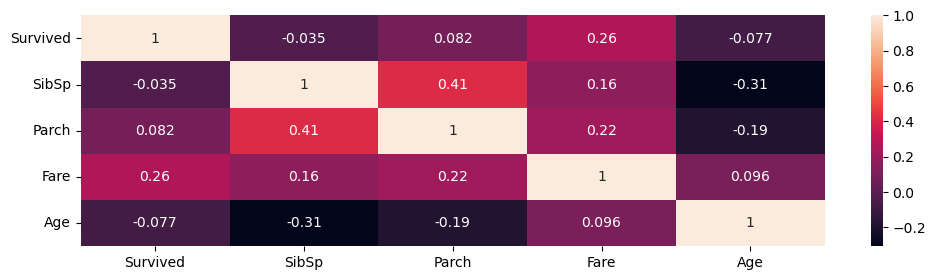

In [140]:
plt.figure(figsize=(12,3))
heatmap=sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

# sibsp= number of sibling/spouses aboard the titanic

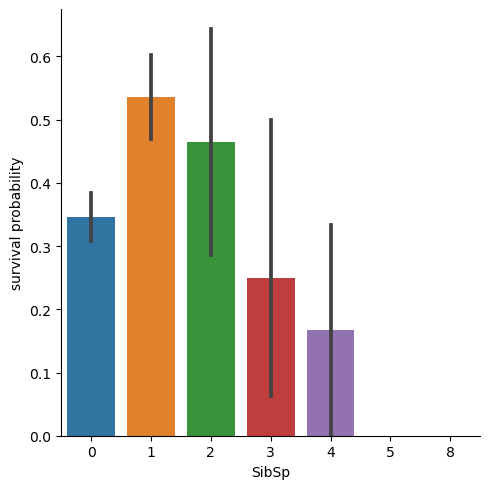

In [141]:
sns.catplot(x='SibSp',y='Survived',data=data,kind='bar').set_ylabels('survival probability')
# so person with 1 sibling has highest probability to survive

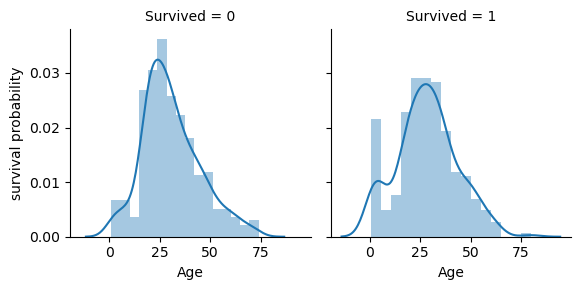

In [142]:
age_visual=sns.FacetGrid(data,col='Survived')
age_visual=age_visual.map(sns.distplot,'Age').set_ylabels('survival probability') # or histplot

AttributeError: 'Axes' object has no attribute 'set_ylabels'

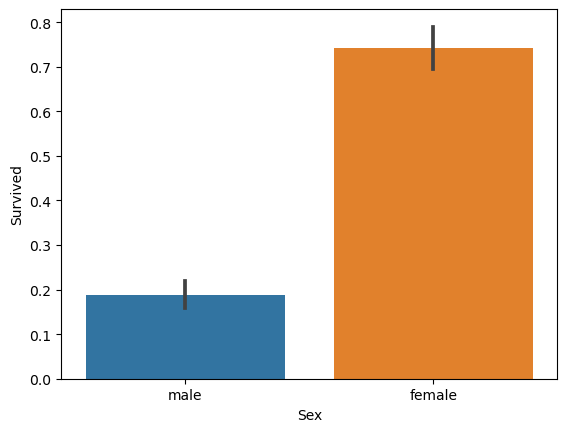

In [143]:
age_plt=sns.barplot(x='Sex',y='Survived',data=data).set_ylabels('survival probability')


In [145]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [146]:
data[['Sex']].groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

# passenger class

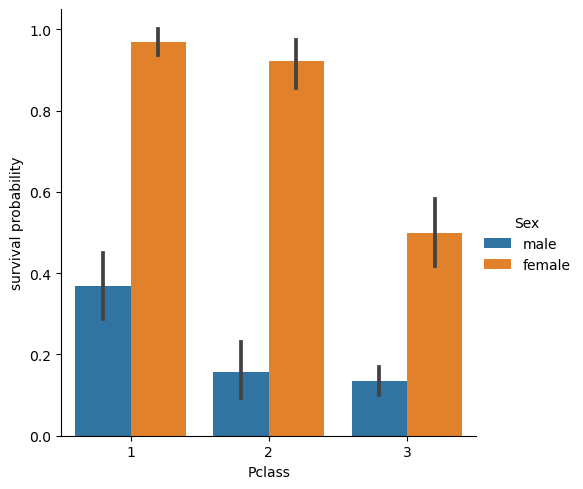

In [147]:
pclass=sns.catplot(x='Pclass',y='Survived',data=data,kind='bar',hue='Sex')
pclass=pclass.set_ylabels('survival probability')

# people of first class have survived the most with female the most

In [148]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Embarked

In [149]:
data['Embarked'].value_counts() # from which station they started their journey

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [150]:
data['Embarked'].isnull().sum()

2

In [165]:
data['Embarked']=data['Embarked'].fillna('S')

In [152]:
data['Embarked'].isnull().sum()

0

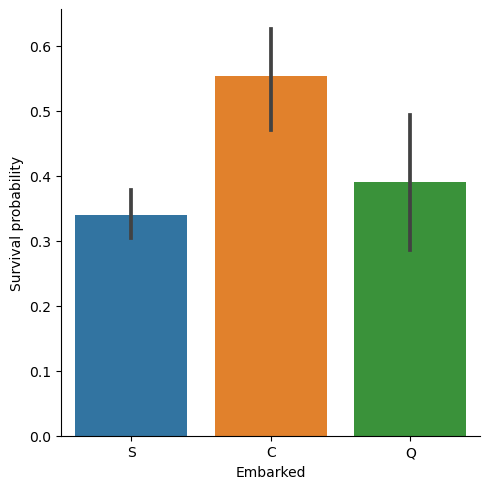

In [154]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='bar').set_ylabels('Survival probability')
# cheborg station passengers has survived the most

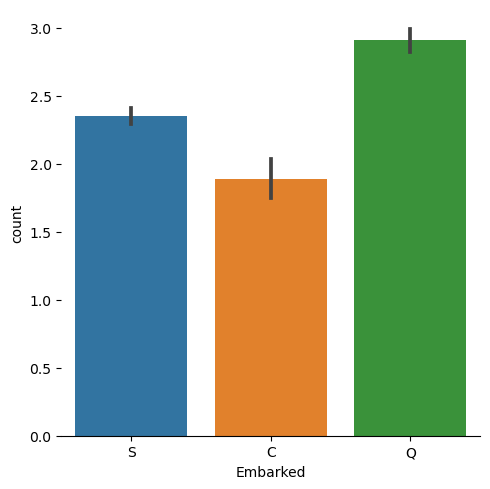

In [155]:
# Explore p class vs embarked

g=sns.catplot(y='Pclass',x='Embarked',data=data,kind='bar')
g.despine(left='True')
g=g.set_ylabels('count')

# Handle null values in age

In [166]:
mean=data['Age'].mean()
sd=data['Age'].std()
null_num=data['Age'].isnull().sum()
print(mean,sd,null_num)

29.69911764705882 14.526497332334044 177


In [167]:
rand_age=np.random.randint(mean-sd,mean+sd,size=null_num)
rand_age[:10]   # it is a numpy array

array([42, 23, 21, 39, 41, 15, 32, 17, 33, 17])

In [168]:
#data.replace(to_replace = np.nan, value = rand_age)  
data.loc[data['Age'].isnull(),'Age']=rand_age
data['Age'].isnull().sum()

0

In [169]:
col_to_drop=['PassengerId','Name','Ticket','Cabin']
data.drop(col_to_drop,axis=1,inplace=True)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [170]:
genders={'male':0,'female':1}
ports={'S':0,'C':1,'Q':2}

data['Sex']=data['Sex'].map(genders)
data['Embarked']=data['Embarked'].map(ports)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0


# Splitting the data

In [172]:
x=data.drop('Survived',axis=1) # or x=data.drop(data.columns[[0]],axis=1)
y=data['Survived']
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1


In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [175]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [177]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)


In [178]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [179]:
log_ypred=logreg.predict(x_test)
svc_ypred=svc_classifier.predict(x_test)
dt_ypred=dt_classifier.predict(x_test)
knn_ypred=knn_classifier.predict(x_test)
rf_ypred=rf_classifier.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score
log_acc=accuracy_score(y_test,log_ypred)
svc_acc=accuracy_score(y_test,svc_ypred)
dt_acc=accuracy_score(y_test,dt_ypred)
knn_acc=accuracy_score(y_test,knn_ypred)
rf_acc=accuracy_score(y_test,rf_ypred)

print(f"{[  round(log_acc*100,2) ]} {[svc_acc*100]} {[dt_acc*100]} {[knn_acc*100]} {[rf_acc*100]} ")

[80.6] [81.71641791044776] [73.88059701492537] [81.71641791044776] [81.71641791044776] 
